In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
salaries = pd.read_csv("C:\\Users\\Bruger\\Downloads\\Position_Salaries.csv")

In [4]:
print(salaries)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [7]:
X = salaries.iloc[:, 1:2].values
y = salaries.iloc[:, 2].values

In [8]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

In [ ]:
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y)

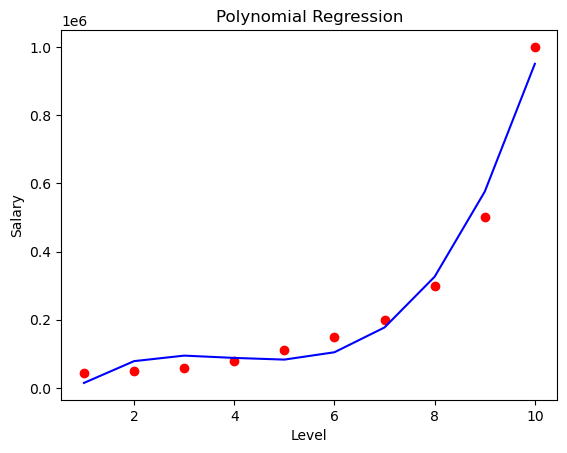

In [13]:
plt.scatter(X, y, color='red')
plt.plot(X, poly_regression.predict(poly_features.transform(X)), color='blue')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

In [27]:
communities = pd.read_csv("C:\\Users\\Bruger\\Downloads\\communities.csv")


In [28]:
numeric_columns = communities.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.fillna(numeric_columns.mean())

In [29]:
X = numeric_columns.iloc[:, :-1].values
y = numeric_columns.iloc[:, -1].values

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
ridge_scores = cross_val_score(Ridge(), X_scaled, y, cv=5)
lasso_scores = cross_val_score(Lasso(), X_scaled, y, cv=5)
elasticnet_scores = cross_val_score(ElasticNet(), X_scaled, y, cv=5)

In [32]:
print("Ridge Mean Score:", ridge_scores.mean())
print("Lasso Mean Score:", lasso_scores.mean())
print("ElasticNet Mean Score:", elasticnet_scores.mean())

Ridge Mean Score: 0.6530416013303052
Lasso Mean Score: -0.0032712089233966958
ElasticNet Mean Score: -0.0032712089233966958


In [ ]:
# Модель з регуляризацією Ridge має найкращу середню оцінку, що свідчить про її кращу ефективність в порівнянні з Lasso та ElasticNet.
# Моделі Lasso та ElasticNet мають від'ємні середні оцінки, що може свідчити про недостатню адаптацію моделі до даних або вплив особливостей даного набору даних на використані методи регуляризації.